Run Pipeline through Step_2 before running this Notebook. Running the next few cells will give us the metric learning performance

In [1]:
import os
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
import numpy as np
import yaml

In [2]:
with open("pipeline_config.yaml") as file:
    all_configs = yaml.load(file, Loader=yaml.FullLoader)

common_configs = all_configs["common_configs"]
metric_learning_configs = all_configs["metric_learning_configs"]
train_split = metric_learning_configs["train_split"]

## The first study inputs events all of the same frequency to see if it successfully reconstructs frequencies that it trained on

In [4]:
import glob

# Get a list of all CSV files in the folder
csv_files = glob.glob('Performance/Metric_learning/*.csv')

last_csv_file = max(csv_files, key=os.path.getctime)
metrics_folders = glob.glob('artifacts/Lambda500_pre_selection_quirk/metric_learning/quirk/version_*')
# Select the last folder from the list
last_metrics_folder = max(metrics_folders, key=os.path.getctime)
# Get the metrics.csv file from the last folder
last_metrics_file = os.path.join(last_metrics_folder, 'metrics.csv')
# Read the last CSV file into a dataframe
performance_df = pd.read_csv(last_csv_file).drop(range(np.sum([train_split[0],train_split[1]]))) # change hardcoded range to reflect build_embedding.py
performance_df.index = performance_df.index - np.sum([train_split[0],train_split[1]])

metric_df = pd.read_csv(last_metrics_file)
metric_df['train_loss'] = metric_df['train_loss'].shift(-1)
metric_df = metric_df.drop(metric_df.index[1::2])

KeyError: '[997, 998, 999] not found in axis'

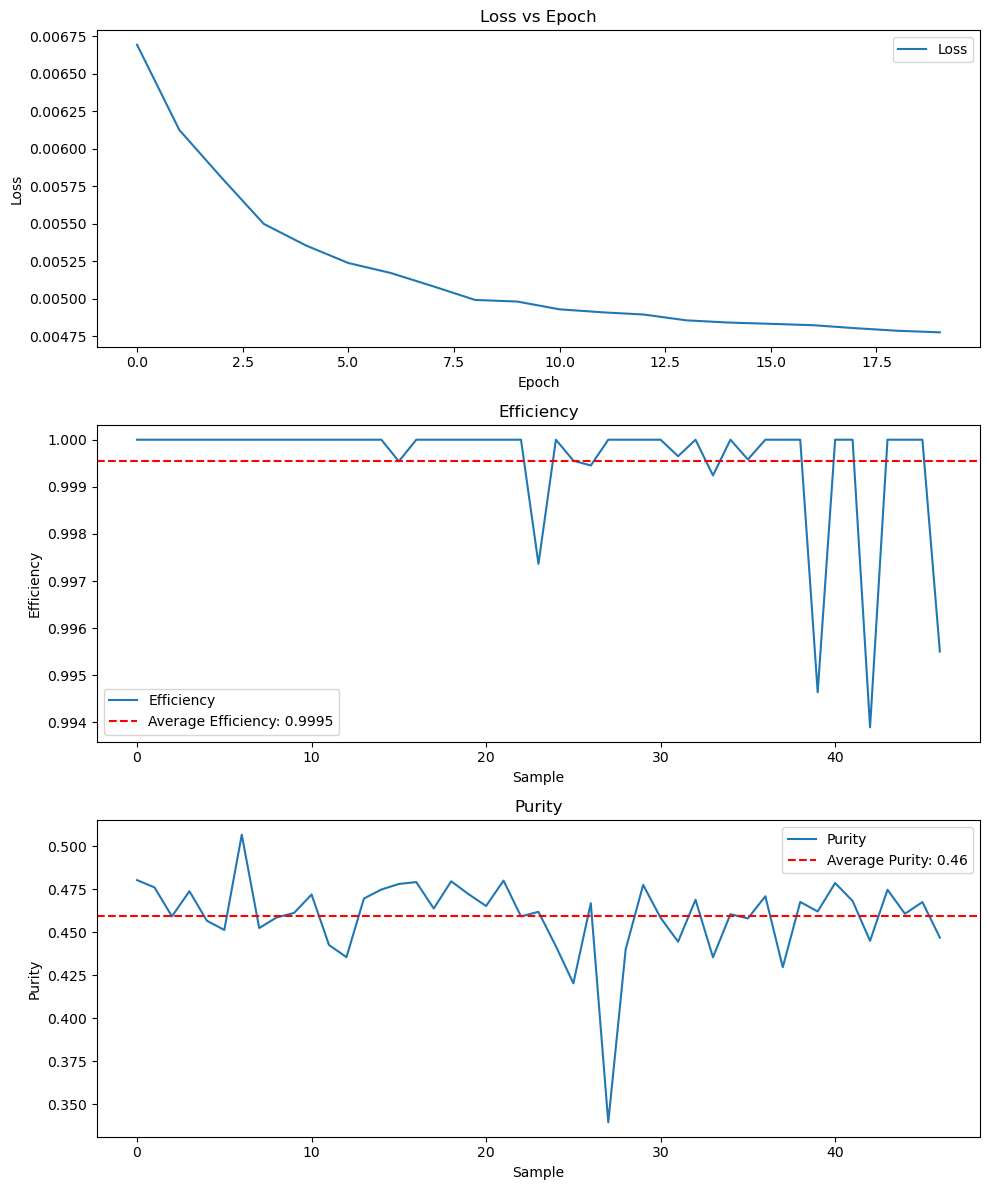

In [31]:
# Plot one of the columns against the index

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot Loss vs Epoch
axs[0].plot(metric_df['epoch'], metric_df['train_loss'], label='Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss vs Epoch')
axs[0].legend()

# Plot Efficiency vs Sample
axs[1].plot(performance_df.index, performance_df['efficiency'], label='Efficiency')
avg_efficiency = performance_df['efficiency'].mean()
axs[1].axhline(y=avg_efficiency, color='r', linestyle='--', label=f'Average Efficiency: {avg_efficiency:.4f}')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Efficiency')
axs[1].set_title('Efficiency')
axs[1].legend()

# Plot Purity vs Sample
axs[2].plot(performance_df.index, performance_df['purity'], label='Purity')
avg_purity = performance_df['purity'].mean()
axs[2].axhline(y=avg_purity, color='r', linestyle='--', label=f'Average Purity: {avg_purity:.2f}')
axs[2].set_xlabel('Sample')
axs[2].set_ylabel('Purity')
axs[2].set_title('Purity')
axs[2].legend()

plt.tight_layout()
plt.show()

## The second study trains on a single frequency and takes a range of frequencies for testing

In [13]:
import glob

# Get a list of all CSV files in the folder
csv_files = glob.glob('Performance/Metric_learning/*.csv')

last_csv_file = max(csv_files, key=os.path.getctime)
metrics_folders = glob.glob('artifacts/Lambda500_pre_selection_quirk/metric_learning/quirk/version_*')
# Select the last folder from the list
last_metrics_folder = max(metrics_folders, key=os.path.getctime)
# Get the metrics.csv file from the last folder
last_metrics_file = os.path.join(last_metrics_folder, 'metrics.csv')
# Read the last CSV file into a dataframe
performance_df = pd.read_csv(last_csv_file).drop(range(np.sum([train_split[0],train_split[1]]))) # change hardcoded range to reflect build_embedding.py
performance_df.index = performance_df.index - np.sum([train_split[0],train_split[1]])

metric_df = pd.read_csv(last_metrics_file)
metric_df['train_loss'] = metric_df['train_loss'].shift(-1)
metric_df = metric_df.drop(metric_df.index[1::2])

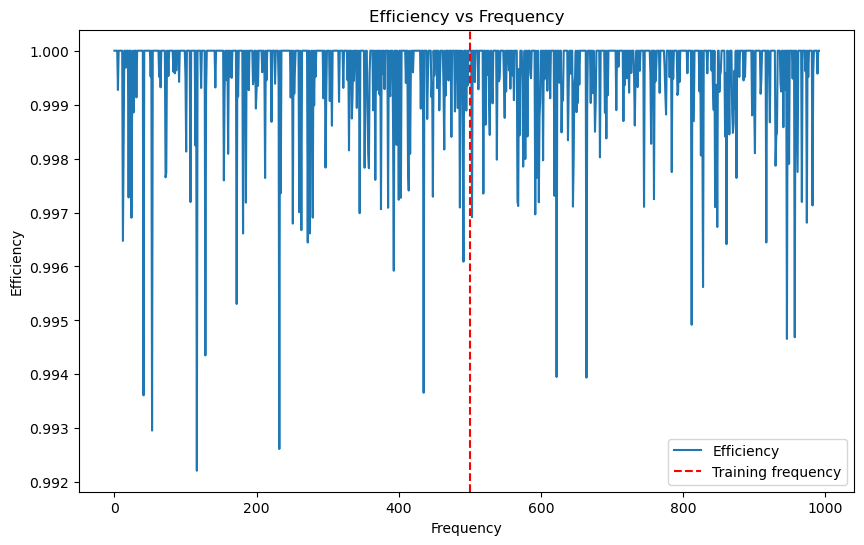

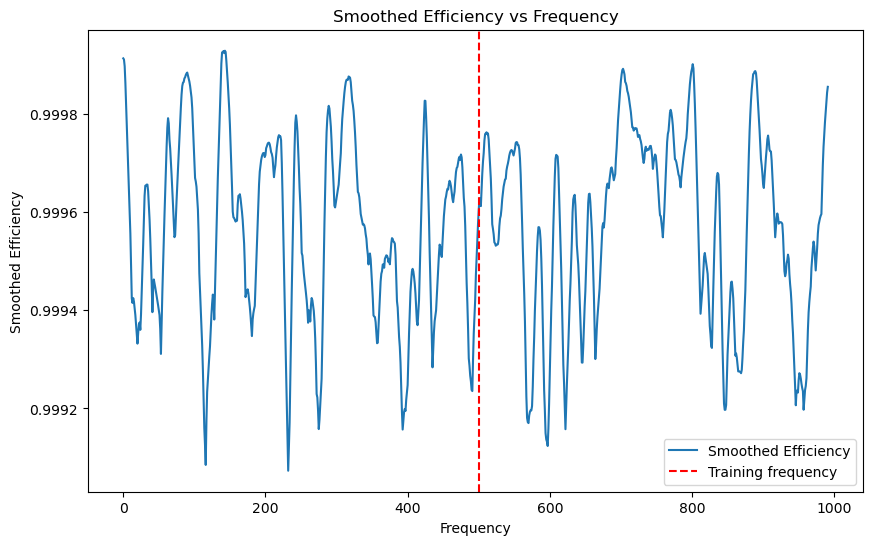

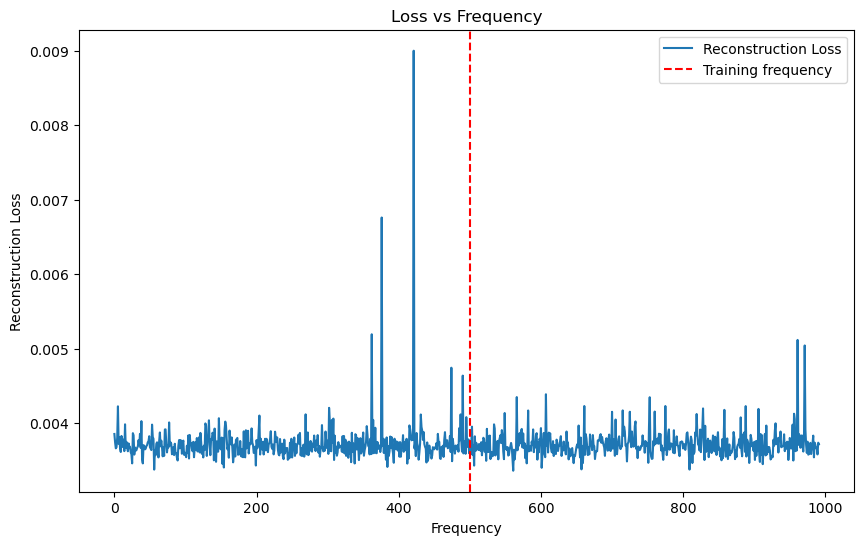

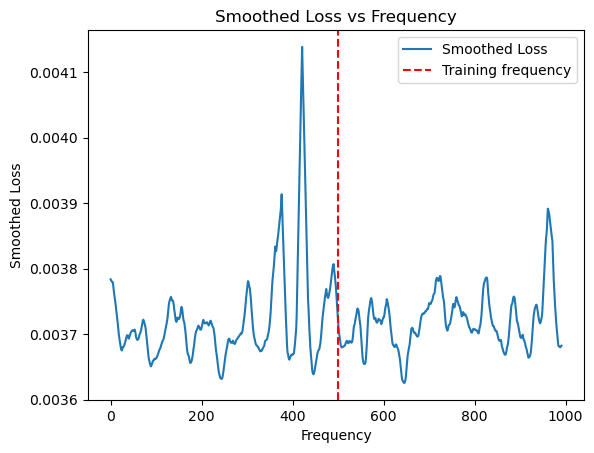

In [20]:
# Plot one of the columns against the index
plt.figure(figsize=(10, 6))
plt.plot(performance_df.index, performance_df['efficiency'], label='Efficiency')
plt.axvline(x=500, color='r', linestyle='--', label='Training frequency')
plt.xlabel('Frequency')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Frequency')
plt.legend()
plt.show()

kernel = np.array([0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2, 1.8, 1.6, 1.4, 1.2, 1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.08, 0.04, 0.02, 0.01])
kernel = kernel / kernel.sum()

smoothed_efficiency = convolve(performance_df['efficiency'], kernel, mode='reflect')

# Plot the smoothed efficiency
plt.figure(figsize=(10, 6))
plt.plot(performance_df.index, smoothed_efficiency, label='Smoothed Efficiency')

plt.axvline(x=500, color='r', linestyle='--', label='Training frequency')
plt.xlabel('Frequency')
plt.ylabel('Smoothed Efficiency')
plt.title('Smoothed Efficiency vs Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(performance_df.index, performance_df['loss'], label='Reconstruction Loss')
plt.axvline(x=500, color='r', linestyle='--', label='Training frequency')
plt.xlabel('Frequency')
plt.ylabel('Reconstruction Loss')
plt.title('Loss vs Frequency')
plt.legend()
plt.show()

kernel = np.array([0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.4,2.2,2,1.8,1.6,1.4,1.2,1,0.8,0.6, 0.4, 0.2, 0.1, 0.08, 0.04, 0.02, 0.01])
kernel = kernel / kernel.sum()

# Perform convolution on the 'loss' column
smoothed_loss = convolve(performance_df['loss'], kernel, mode='reflect')

# Plot the smoothed loss
plt.plot(performance_df.index, smoothed_loss, label='Smoothed Loss')
plt.axvline(x=500, color='r', linestyle='--', label='Training frequency')
plt.xlabel('Frequency')
plt.ylabel('Smoothed Loss')
plt.title('Smoothed Loss vs Frequency')
plt.legend()
plt.show()

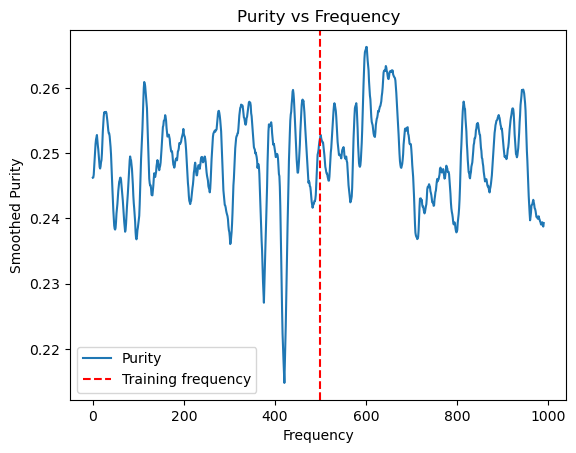

In [21]:
kernel = np.array([0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1,1.2,1.4,1.6,1.8,2,2.2,2,1.8,1.6,1.4,1.2,1,0.8,0.6, 0.4, 0.2, 0.1, 0.08, 0.04, 0.02, 0.01])
kernel = kernel/sum(kernel)

# Perform convolution on the 'loss' column
smoothed_loss = convolve(performance_df['purity'], kernel, mode='reflect')

# Plot the smoothed loss
plt.plot(performance_df.index, smoothed_loss, label='Purity')
plt.axvline(x=500, color='r', linestyle='--', label='Training frequency')
plt.xlabel('Frequency')
plt.ylabel('Smoothed Purity')
plt.title('Purity vs Frequency')
plt.legend()
plt.show()


## The third test

In [21]:
import glob

# Get a list of all CSV files in the folder
csv_files = glob.glob('Performance/Metric_learning/*.csv')

last_csv_file = max(csv_files, key=os.path.getctime)
metrics_folders = glob.glob('artifacts/Lambda500_pre_selection_quirk/metric_learning/quirk/version_*')
# Select the last folder from the list
last_metrics_folder = max(metrics_folders, key=os.path.getctime)
# Get the metrics.csv file from the last folder
last_metrics_file = os.path.join(last_metrics_folder, 'metrics.csv')
# Read the last CSV file into a dataframe
performance_df = pd.read_csv(last_csv_file)
performance_df = performance_df.tail(1024)
performance_df.set_index('sample', inplace=True)

In [25]:
display(performance_df)
perf_arr = performance_df.to_numpy()
print(perf_arr.T[2])
loss = perf_arr.T[1]
purity = perf_arr.T[2]
efficiency = perf_arr.T[3]
loss = loss.reshape(32,32)
purity = purity.reshape(32,32)
efficiency = efficiency.reshape(32,32)
print(purity.shape)
print(loss.shape)

,Unnamed: 0,loss,purity,efficiency
sample,,,,
995,990,0.002636,0.497535,1.000000
996,991,0.002702,0.480562,1.000000
997,992,0.002584,0.492409,0.996926
998,993,0.002621,0.497379,1.000000
999,994,0.002639,0.492915,1.000000
...,...,...,...,...
2020,2009,0.002664,0.485355,0.996067
2021,2010,0.002697,0.470668,1.000000
2022,2011,0.002667,0.478850,0.994032


[0.49753451 0.48056191 0.4924089  ... 0.4788501  0.4806335  0.48647574]
(32, 32)
(32, 32)


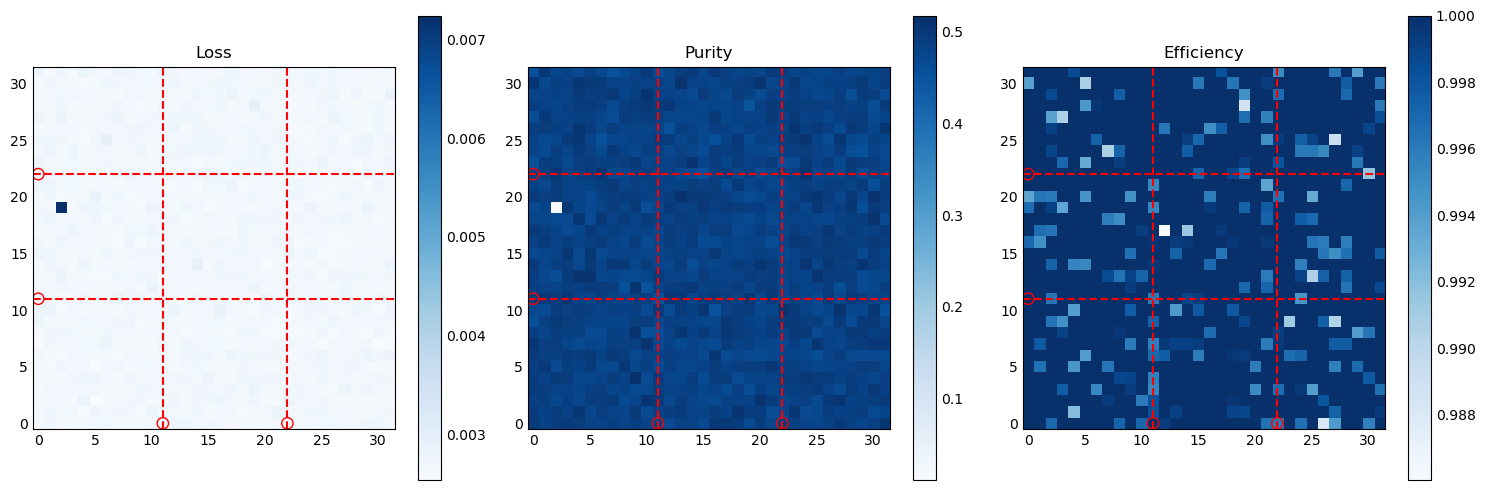

<Figure size 200x200 with 0 Axes>

In [26]:
plt.style.use('_mpl-gallery-nogrid')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the subplots
for i, ax in enumerate(axs):
    # Get the data for the current subplot
    if i == 0:
        z = loss
        title = 'Loss'
    elif i == 1:
        z = purity
        title = 'Purity'
    elif i == 2:
        z = efficiency
        title = 'Efficiency'
    
    # Plot the data
    im = ax.imshow(z, origin='lower')
    ax.set_title(title)
    ax.axvline(x=11, color='r', linestyle='--', label='Training frequency')
    ax.axvline(x=22, color='r', linestyle='--')
    ax.axhline(y=11, color='r', linestyle='--')
    ax.axhline(y=22, color='r', linestyle='--')
    ax.add_patch(plt.Circle((0, 11), 0.5, color='r', fill=False))  # Add the circle patch
    ax.add_patch(plt.Circle((0, 22), 0.5, color='r', fill=False))
    ax.add_patch(plt.Circle((11, 0), 0.5, color='r', fill=False))
    ax.add_patch(plt.Circle((22, 0), 0.5, color='r', fill=False))
    # Add color legend
    cbar = plt.colorbar(im, ax=ax)

# Show the subplots
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

Now Run the Pipeline through Step_4 to show the performance of the Gnn